In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import json
%matplotlib inline
from matplotlib import rc, font_manager
ticks_font = font_manager.FontProperties(family='serif', style='normal',
                                         size=24, weight='normal', stretch='normal')

In [2]:
from __future__ import print_function
import numpy as np
from sklearn import datasets, linear_model

from genetic_selection import GeneticSelectionCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [3]:
from bgotools.my_hull_funcs import my_hull_funcs 
from bgotools.set_pool import set_pool

In [5]:
def GSLError(True_GSL,GSL_difference):
    #print(np.sqrt(np.trapz(GSL_difference**2)))
    #print(np.sqrt(np.trapz(True_GSL**2)))
    GSL_ERROR = np.sqrt(np.trapz(GSL_difference**2))/np.sqrt(np.trapz(True_GSL**2))
    return GSL_ERROR

In [6]:
# for training data
def f(x):
    try:
        return np.float(x)
    except:
        return np.nan

In [7]:
# read data 
# read the query data formation_energy, clex, corr
data = pd.read_csv('./BGO_EI_data',sep='\s+')
# read the eci data


In [8]:
corr_data = data.iloc[:, 5:] 
data

,configname,selected,comp(a),formation_energy,clex(),corr(0),corr(1),corr(2),corr(3),corr(4),...,corr(238),corr(239),corr(240),corr(241),corr(242),corr(243),corr(244),corr(245),corr(246),corr(247)
0,SCEL1_1_1_1_0_0_0/0,1,1.000000,0.00000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,SCEL1_1_1_1_0_0_0/1,1,0.875000,-0.03401745,-0.035452,1.0,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2,SCEL1_1_1_1_0_0_0/10,1,0.625000,-0.08774064,-0.085923,1.0,0.500000,0.500000,0.000000,0.500000,...,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,SCEL1_1_1_1_0_0_0/100,1,0.625000,-0.06716164,-0.068766,1.0,0.500000,0.000000,0.500000,0.500000,...,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.5,0.000000,0.000000,0.000000
4,SCEL1_1_1_1_0_0_0/101,1,0.500000,-0.08761127,-0.077558,1.0,1.000000,0.000000,0.500000,0.500000,...,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.5,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58160,SCEL3_3_1_1_0_1_2/995,1,0.291667,unknown,-0.040703,1.0,0.500000,0.833333,0.666667,0.833333,...,0.055556,0.166667,0.333333,0.333333,0.166667,0.166667,0.0,0.000000,0.166667,0.166667
58161,SCEL3_3_1_1_0_1_2/996,1,0.458333,unknown,-0.064093,1.0,0.500000,0.666667,0.500000,0.500000,...,0.055556,0.166667,0.000000,0.000000,0.055556,0.000000,0.0,0.000000,0.000000,0.000000
58162,SCEL3_3_1_1_0_1_2/997,1,0.375000,unknown,-0.053905,1.0,0.500000,0.666667,0.666667,0.666667,...,0.055556,0.111111,0.000000,0.333333,0.166667,0.000000,0.0,0.111111,0.111111,0.111111
58163,SCEL3_3_1_1_0_1_2/998,1,0.458333,unknown,-0.046311,1.0,0.666667,0.500000,0.500000,0.500000,...,0.055556,0.000000,0.000000,0.000000,0.055556,0.000000,0.0,0.000000,0.055556,0.055556


In [9]:
# process data 
data['clex()'] = data['clex()'].apply(f)
calculated_data = data['formation_energy'].notnull()
# calculated data
X_data_all = data['comp(a)']
Y_data_all = data['clex()']

len(X_data_all)#number of calculated data

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


58165

In [10]:
# get convex hull 
my_hull = my_hull_funcs(X_data_all,Y_data_all)
my_hull.get_bottom_hull()
true_convex_hull, true_convex_hull_index = my_hull.bt_hull_points, my_hull.bt_hull_vertices
hull_function = my_hull.bt_hull_facets
my_hull.shoelace_area()

In [14]:
random.seed(101)
#Number of initial data pool (user)
N_init = 30
init_idxs = random.sample(range(len(data)),N_init)

if data[data['comp(a)']==0].index[0] not in init_idxs:
    init_idxs.append(data[data['comp(a)']==0].index[0])
if data[data['comp(a)']==1].index[0] not in init_idxs:
    init_idxs.append(data[data['comp(a)']==1].index[0])

In [15]:
# start making inputs for GPyOpt
# Y property for training/prediction
Y_name = 'clex()' 
# training pool
N_train = len(init_idxs)
train_index = init_idxs
# design pool
N_design = len(data)
design_index = (range(len(data)))
# corrs 
num_corrs = sum('corr' in s for s in data.columns)
selected_corrs = np.ones(num_corrs) # all correlation functions
# set_pool make the training pool and design pool according to the above settings
my_pool = set_pool(data,train_index,design_index,selected_corrs,Y_name,ternary=False)

In [19]:
# remind the initial training data pool 
X_train = my_pool.train_X
Y_train = my_pool.train_Y
done_experiments_id_list = [x for x in my_pool.train_index]
# remind the design data pool
X_design = my_pool.design_X
#design_idxs
# remind the formation energy calculation from the ECIs
#eci_list
#CE_formation_energy
# 
# 
# remind the true ground state line
true_convex_hull_X = data['comp(a)'][true_convex_hull_index]
true_convex_hull_Y = data['clex()'][true_convex_hull_index]
X_list = np.linspace(0,1,100)

In [20]:
# setup the genetic algo 


my_estimator = linear_model.LinearRegression()

my_selector = GeneticSelectionCV(my_estimator,
                              cv=3,
                              verbose=0,
                              scoring="neg_root_mean_squared_error",
                              max_features=25,
                              n_population=100,
                              crossover_proba=0.5,
                              mutation_proba=0.2,
                              n_generations=500,
                              crossover_independent_proba=0.5,
                              mutation_independent_proba=0.01,
                              tournament_size=3,
                              n_gen_no_change=10,
                              caching=True,
                              n_jobs=-1)

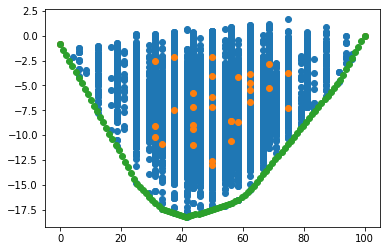

In [21]:
# interactive plot calculated
# visualization of the DFT hull 


plt.scatter(data['comp(a)']*100, data['clex()']*1000/8)
plt.scatter( my_pool.train_comp*100, my_pool.train_Y*1000/8)
hull_x_grid = np.linspace(0,1,100)
plt.scatter(hull_x_grid*100,my_hull.bt_hull_facets(hull_x_grid)*1000/8)
#fig.add_scatter(x = hull_x_grid*100,y = my_Af.predicted_hull.bt_hull_facets(hull_x_grid)*1000/8)
#plt.scatter(hull_x_grid*100,known_hull.bt_hull_facets(hull_x_grid)*1000/8)
plt.show()

In [22]:
# single fit based on the initial data pool
my_fit = my_selector.fit(X_train.tolist(),Y_train.tolist())

In [23]:
# RMSE of the fit
RMSE = mean_squared_error(my_fit.predict(X_train),Y_train)
print(r'RMSE of the fit: {}'.format(RMSE))

RMSE of the fit: 2.3084404734581053e-05


In [24]:
# score of the fit, need to figure out what this score is about...
my_fit.score(X_train,Y_train)

0.968037973173258

In [25]:
np.shape(X_train)

(32, 248)

In [27]:
# predict the next convex hull
# find the convex hull of the fit 
myfit_X = data['comp(a)']
myfit_Y = my_fit.predict(my_pool.design_X)
train_hull = my_hull_funcs(myfit_X,myfit_Y)
train_hull.get_bottom_hull()
train_convex_hull, train_convex_hull_index = train_hull.bt_hull_points, train_hull.bt_hull_vertices
train_hull_function = train_hull.bt_hull_facets

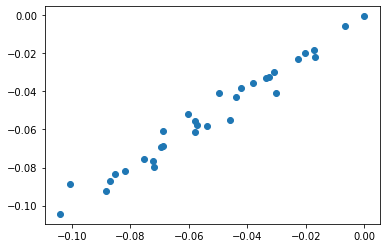

In [28]:
plt.scatter(Y_train,my_fit.predict(X_train))

In [29]:
train_hull.bt_hull_vertices

array([54367, 54287, 56404, 51964, 54389,     0,    41, 54378],
      dtype=int32)

Text(0, 0.5, 'y')

<Figure size 432x288 with 0 Axes>

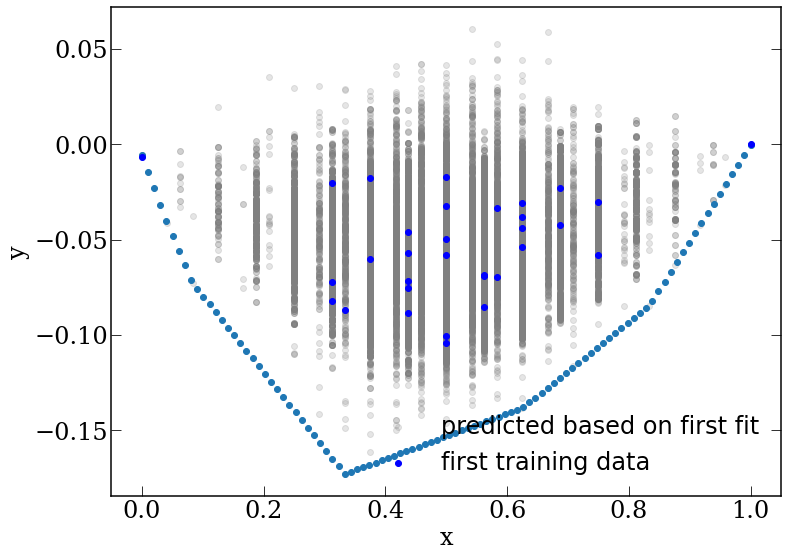

In [32]:
plt.draw()
f = plt.figure(figsize=(12,9))

(ax1) = f.subplots(1,1)
[i.set_linewidth(1.5) for i in ax1.spines.values()]

#ax1.set_xlim(0.0,1501)
#ax1.set_ylim(0,4)
labels=[570,770,970,1170]

colors=np.array([[0,0,0],[30,136,229],[225,193,7],[212,27,93]])/256

# plot the predicted data
ax1.scatter(myfit_X,my_fit.predict(my_pool.design_X),color='grey',alpha=0.2,label='predicted based on first fit')
# plot the predicted convex hull
ax1.scatter(hull_x_grid,train_hull.bt_hull_facets(hull_x_grid))

# plot the initial data 
ax1.scatter(my_pool.train_comp,my_pool.train_Y,label='first training data',color='b')

ax1.tick_params(direction='in',axis='both',length=10,right=True)
for labelx1 in (ax1.get_xticklabels()):
    labelx1.set_fontproperties(ticks_font)
    
for labely1 in (ax1.get_yticklabels()):
    labely1.set_fontproperties(ticks_font)
    
ax1.set_xlabel('x',fontproperties=ticks_font)
ax1.legend(fontsize=24,frameon=False)
ax1.set_ylabel('y',fontproperties=ticks_font)




In [34]:
# now start to use genetic algo to:
# 1. train the CE based on initial data pool
# 2. predict the next experiments by the convex hull of the fit in the design pool
#    record the RMSE
#    record the CV
# 3. append the new experiments to the training set, repeat 1
# stop after 10 iterations
max_iteration = 6

In [35]:

# setup the linear regression and genetic algorithm + CV
my_estimator = linear_model.LinearRegression()
my_selector = GeneticSelectionCV(my_estimator,
                              cv=3,
                              verbose=0,
                              scoring="neg_root_mean_squared_error",
                              max_features=30,
                              n_population=50,
                              crossover_proba=0.5,
                              mutation_proba=0.2,
                              n_generations=500,
                              crossover_independent_proba=0.5,
                              mutation_independent_proba=0.01,
                              tournament_size=3,
                              n_gen_no_change=10,
                              caching=True,
                              n_jobs=-1)


In [36]:
train_index_update = train_index
my_pool_update = set_pool(data,train_index,design_index,selected_corrs,Y_name,ternary=False)

In [209]:
n_runs = 10
max_iteration = 11
r_train_index_update = []
r_my_pool_update = []
r_saved_model_list = []
r_next_experiment_id_list = []
r_next_experiment_idxs_list_non_duplicated = []
r_hull_evolve = []
for run_i in range(n_runs):
    print('>>>Starting {} run.'.format(run_i))
    train_index_update = [x for x in train_index]
    my_pool_update = set_pool(data,train_index,design_index,selected_corrs,Y_name,ternary=False)
    # careful fit, fitting score > 0.97
    next_experiment_id_list = []
    next_experiment_id_list.append(init_idxs)
    done_experiments_id_list = [x for x in init_idxs]
    CVXhull_X_evolve = []
    CVXhull_Y_evolve = []
    RMSE_evolve = []
    fit_score_evolve = []
    myfit_i_evolve = []
    CVXhull_difference_evolve = []
    next_experiment_idxs_list_non_duplicated = []
    hull_evolve = []
    for it in range(max_iteration): # 11 iterations, so to compare with the BGO
        print('--------iteration {} starts--------'.format(it))
        print('Number of data points observed: {}'.format(len(my_pool_update.train_Y_nd)))
        n_hull_get = 0
        for hull_config in true_convex_hull_index:
            if hull_config in train_index_update:
                n_hull_get+=1
        print('Number of true hull configurations observed: {}'.format(n_hull_get))
        next_experiment_idxs_non_duplicated = []
        # fitting
        myfit_i_score = 0
        while myfit_i_score <= 0.9:
            myfit_i = my_selector.fit(my_pool_update.train_X.tolist(),my_pool_update.train_Y.tolist())
            myfit_i_predicts_Y = myfit_i.predict(my_pool_update.design_X.tolist())
            myfit_i_RMSE = mean_squared_error(myfit_i.predict(my_pool_update.train_X),my_pool_update.train_Y)
            myfit_i_score = myfit_i.score(my_pool_update.train_X,my_pool_update.train_Y)
        RMSE_evolve.append(myfit_i_RMSE)
        myfit_i_evolve.append(myfit_i)
        fit_score_evolve.append(myfit_i_score)
        predict_hull = my_hull_funcs(my_pool_update.design_comp,myfit_i.predict(my_pool_update.design_X.tolist()))
        predict_hull.get_bottom_hull()
        known_hull = my_hull_funcs(my_pool_update.train_comp,my_pool_update.train_Y)
        known_hull.get_bottom_hull()
        hull_evolve.append(known_hull.bt_hull_facets)
        train_convex_hull, train_convex_hull_index = predict_hull.bt_hull_points, predict_hull.bt_hull_vertices
        
        for config in train_convex_hull_index:
            if len(next_experiment_idxs_non_duplicated)<5: # pick a batch of 5
                if config not in train_index_update:
                    next_experiment_idxs_non_duplicated.append(config)
        train_index_update = train_index_update + next_experiment_idxs_non_duplicated
        my_pool_update = set_pool(data,train_index_update,design_index,selected_corrs,Y_name,ternary=False)
        next_experiment_id_list.append(next_experiment_idxs_non_duplicated)
        

        # start to add the predicted configurations to the next experiment
        print('--------iteration {} finished--------'.format(it))
        print('Selected Structures: {}'.format(next_experiment_idxs_non_duplicated))
        #print(train_index_update)
        print('Fitting scores: {}'.format(myfit_i_score))
        print('Fitting RMSE: {}'.format(myfit_i_RMSE))
    r_next_experiment_id_list.append(next_experiment_id_list)
    r_train_index_update.append(train_index_update)
    r_hull_evolve.append(hull_evolve)

>>>Starting 0 run.
--------iteration 0 starts--------
Number of data points observed: 32
Number of true hull configurations observed: 2
--------iteration 0 finished--------
Selected Structures: [54522, 54378, 54367, 54287, 54176]
Fitting scores: 0.9934301483572711
Fitting RMSE: 4.74504058171977e-06
--------iteration 1 starts--------
Number of data points observed: 37
Number of true hull configurations observed: 5
--------iteration 1 finished--------
Selected Structures: [51853, 23283, 23, 54356, 57442]
Fitting scores: 0.9719357313919791
Fitting RMSE: 3.081519051059264e-05
--------iteration 2 starts--------
Number of data points observed: 42
Number of true hull configurations observed: 7
--------iteration 2 finished--------
Selected Structures: [54065, 128, 54, 59, 23377]
Fitting scores: 0.9656796174743051
Fitting RMSE: 4.479372789252472e-05
--------iteration 3 starts--------
Number of data points observed: 47
Number of true hull configurations observed: 8
--------iteration 3 finished--

Text(0, 0.5, 'y')

<Figure size 432x288 with 0 Axes>

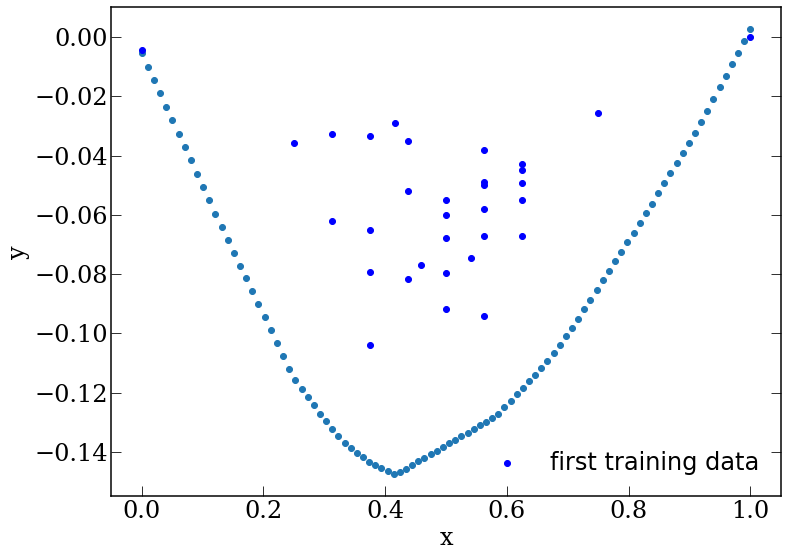

In [175]:
plt.draw()
f = plt.figure(figsize=(12,9))

(ax1) = f.subplots(1,1)
[i.set_linewidth(1.5) for i in ax1.spines.values()]

#ax1.set_xlim(0.0,1501)
#ax1.set_ylim(0,4)
labels=[570,770,970,1170]

colors=np.array([[0,0,0],[30,136,229],[225,193,7],[212,27,93]])/256

ax1.scatter(hull_x_grid,predict_hull.bt_hull_facets(hull_x_grid))
#ax1.scatter(my_pool_update.train_comp,myfit_i.predict(my_pool_update.design_X.tolist()))
# plot the initial data 
ax1.scatter(comps_init,training_Y,label='first training data',color='b')

ax1.tick_params(direction='in',axis='both',length=10,right=True)
for labelx1 in (ax1.get_xticklabels()):
    labelx1.set_fontproperties(ticks_font)
    
for labely1 in (ax1.get_yticklabels()):
    labely1.set_fontproperties(ticks_font)
    
ax1.set_xlabel('x',fontproperties=ticks_font)
ax1.legend(fontsize=24,frameon=False)
ax1.set_ylabel('y',fontproperties=ticks_font)



